# 1. Problem Statement

###  *How might we* develop an **AI-driven solution** to **accurately predict resale flat prices in Singapore's public housing market**, addressing the pressing need for accurate forecasts **amidst market fluctuations?**

## 2. Data Acquisition

We got the dataset from **Kaggle**, an open source. It contains Singapore Housing and Development Board Resale Flat Prices from the year **2017 to 2023.**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('data.csv')

# print data types of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   month                           155821 non-null  object 
 1   town                            155821 non-null  object 
 2   public_housing_flat_type        155821 non-null  object 
 3   block                           155821 non-null  object 
 4   street_name                     155821 non-null  object 
 5   storey_range                    155821 non-null  object 
 6   floor_area_sqm                  155821 non-null  float64
 7   flat_model                      155821 non-null  object 
 8   lease_commence_date             155821 non-null  int64  
 9   remaining_lease                 155821 non-null  object 
 10  resale_price_Singapore_dollars  155821 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.1+ MB
None


## 3. Data Exploration - Exploratory Data Analysis (EDA)

This stage is a crucial stage in the **AI Project Lifecycle** to *uncover insights* from visualising the dataset. In the next few code blocks, we will be looking at what the dataset contains and visualising the different variables. 

**Variable Identification**: 
- **Predictor variables (Input)**
    - Month
    - Town
    - Public Housing Flat Type
    - Block
    - Street Name
    - Storey Range
    - Floor Area Sqm
    - Flat Model
    - Lease Commencement Date
    - Remaining Lease

- **Target Variable (Output)**: Resale Price in Singapore Dollars

In [3]:
# Display first 5 data rows
df.head()

,month,town,public_housing_flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
# Display summary statistics
print(df.describe())

       floor_area_sqm  lease_commence_date  resale_price_Singapore_dollars
count   155821.000000        155821.000000                    1.558210e+05
mean        97.477862          1995.668087                    4.835541e+05
std         24.046407            13.823952                    1.671764e+05
min         31.000000          1966.000000                    1.400000e+05
25%         82.000000          1985.000000                    3.600000e+05
50%         94.000000          1996.000000                    4.515000e+05
75%        113.000000          2008.000000                    5.750000e+05
max        249.000000          2019.000000                    1.500000e+06


In [5]:
# Check for missing values
print(df.isnull().sum())

month                             0
town                              0
public_housing_flat_type          0
block                             0
street_name                       0
storey_range                      0
floor_area_sqm                    0
flat_model                        0
lease_commence_date               0
remaining_lease                   0
resale_price_Singapore_dollars    0
dtype: int64


In [6]:
# Renaming variables with shorter names and remove underscores
df.rename(columns={
    'resale_price_Singapore_dollars': 'Price',
    'floor_area_sqm': 'Area',
    'remaining_lease': 'RemainingLease',
    'lease_commence_date': 'LeaseCommenceDate',
    'storey_range': 'StoreyRange',
    'town': 'Town',
    'public_housing_flat_type': 'FlatType',
    'flat_model': 'FlatModel',
    'street_name': 'Street',
    'month': 'Month',
    'town': 'Town',
    'block': 'Block',
    'storey_range': 'StoreyRange'
}, inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())


     Month        Town FlatType Block             Street StoreyRange  Area  \
0  2017-01  ANG MO KIO   2 ROOM   406  ANG MO KIO AVE 10    10 TO 12  44.0   
1  2017-01  ANG MO KIO   3 ROOM   108   ANG MO KIO AVE 4    01 TO 03  67.0   
2  2017-01  ANG MO KIO   3 ROOM   602   ANG MO KIO AVE 5    01 TO 03  67.0   
3  2017-01  ANG MO KIO   3 ROOM   465  ANG MO KIO AVE 10    04 TO 06  68.0   
4  2017-01  ANG MO KIO   3 ROOM   601   ANG MO KIO AVE 5    01 TO 03  67.0   

        FlatModel  LeaseCommenceDate      RemainingLease     Price  
0        Improved               1979  61 years 04 months  232000.0  
1  New Generation               1978  60 years 07 months  250000.0  
2  New Generation               1980  62 years 05 months  262000.0  
3  New Generation               1980   62 years 01 month  265000.0  
4  New Generation               1980  62 years 05 months  265000.0  


### Univariate Analysis - Exploration of variables one by one

- Visualisation of Categorical variables - understand the distribution of each variable.
- Visualisation of Continuous variables - understand the central tendency and spread of the variable.

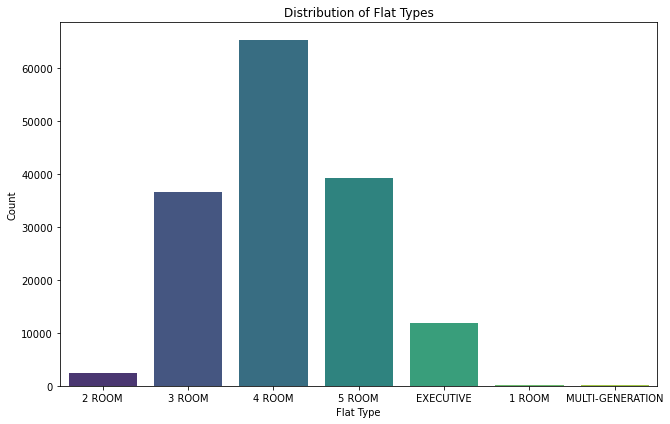

In [7]:
# Countplot for flat types - Categorical variable
plt.figure(figsize=(18, 6)) 

plt.subplot(1, 2, 1)
sns.countplot(x=df['FlatType'], palette='viridis')
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

In [8]:
## TODO - univariate - Ramita

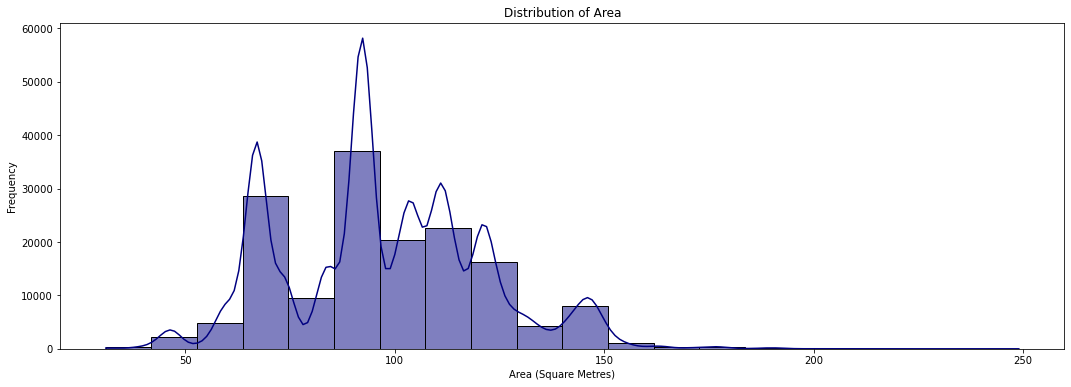

In [9]:
# Countplot for area - Continuous variable
plt.figure(figsize=(18, 6))

# Visualise data in histogram and add KDE
sns.histplot(df['Area'], bins=20, kde=True, color='navy')
plt.title('Distribution of Area')
plt.xlabel('Area (Square Metres)')
plt.ylabel('Frequency')

plt.show()

In [22]:
## TODO - univariate - Dheeptha

In [23]:
## TODO - univariate - Harini

### Bivariate Analysis - Exploration of relationship between two variables

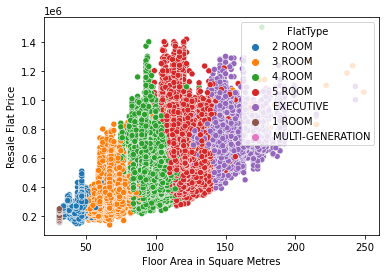

In [10]:
# Scatter Plot to visualise the relationship between the floor area ('Area') and resale flat prices ('Price')
sns.scatterplot(data=df,x='Area',y='Price', hue='FlatType')
plt.ylabel('Resale Flat Price')
plt.xlabel('Floor Area in Square Metres')
plt.show()

In [54]:
## TODO - bivariate - Ramita

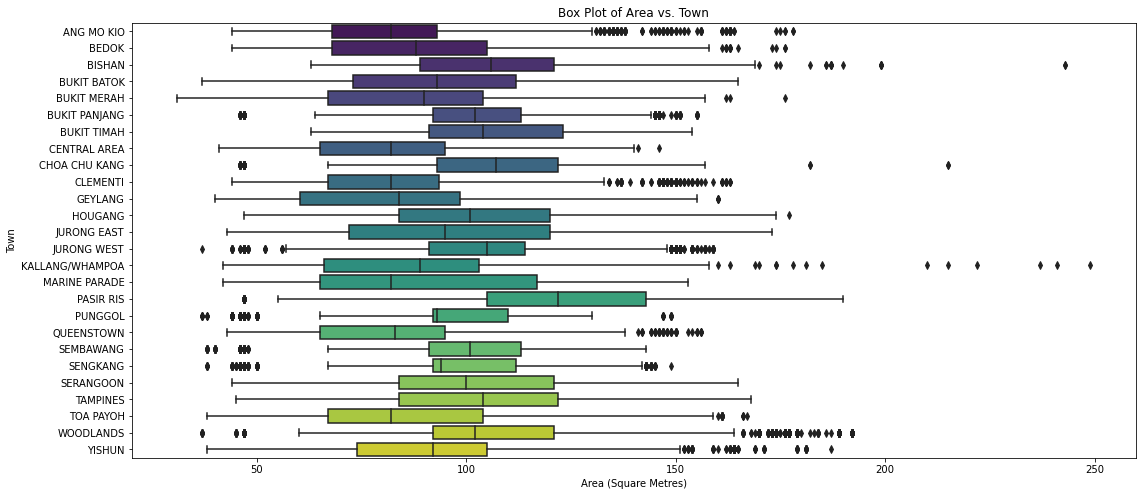

In [32]:
# Box Plot to compare floor area ('Area') and town ('Town') - one categorical and one continuous variable
# To visualise how the floor areas of properties vary across different towns
plt.figure(figsize=(18, 8))

sns.boxplot(x='Area', y='Town', data=df, palette='viridis')
plt.title('Box Plot of Area vs. Town')
plt.xlabel('Area (Square Metres)')
plt.ylabel('Town')

plt.show()

In [56]:
## TODO - bivariate - Dheeptha

In [ ]:
## TODO - bivariate - Harini